# **Assignment 2**
**Group no - 74**

**Group Members**

- Akshay Kumar (cs23mtech11022)

- Sanket Rathod (cs23mtech11033)

## Q2) (a)

Perform k means clustering with k=10 on the raw data and on data obtained after PCA
dimensionality reduction for dimension as found in question 1 (a) and for dimension 10
as in question 1 (b). You may use only training data of SVHN to perform this. Do you
observe images from the same class to be clustered together ? For each cluster, provide
the image closest to the centroid.

In [3]:
# Importing the required libraries for performing different tasks.
import numpy as np
from statistics import mode
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

Data preparation section:

In [4]:
# The matlab file is loaded using loadmat function
data = loadmat('train_32x32.mat')

# Loading the .mat files creates 2 variables:
# X which is a 4-D matrix containing the images,
# and y which is a vector of class labels.
images = data['X']
labels = data['y']

# Printing the dataset to veiw its actual content
print(images)
print()
print(labels)

[[[[ 33  84  19 ...  92 190 216]
   [ 30  76  54 ...  78 188 217]
   [ 38  59 110 ... 101 191 212]]

  [[ 15  86  20 ...  94 205 221]
   [ 23  73  52 ...  82 203 222]
   [ 19  66 111 ... 105 206 217]]

  [[ 15  77  25 ... 114 220 226]
   [ 17  78  57 ... 101 218 227]
   [ 19  56 116 ... 125 220 221]]

  ...

  [[ 72  90  65 ... 200 229 200]
   [ 65  78 144 ... 201 231 199]
   [ 56  69 223 ... 203 224 191]]

  [[ 82  88  78 ... 192 229 193]
   [ 77  77 148 ... 193 229 188]
   [ 57  67 218 ... 195 224 182]]

  [[ 89  88  98 ... 190 229 197]
   [ 79  78 158 ... 191 228 189]
   [ 59  66 220 ... 193 223 186]]]


 [[[ 28  85  21 ...  92 183 204]
   [ 39  77  53 ...  78 182 205]
   [ 35  61 110 ... 103 186 202]]

  [[ 14  83  19 ...  93 200 210]
   [ 25  73  52 ...  80 199 211]
   [ 22  64 106 ... 106 201 208]]

  [[ 14  74  25 ... 111 218 220]
   [ 20  69  56 ...  98 217 221]
   [ 17  59 111 ... 124 218 217]]

  ...

  [[ 40  89  63 ... 181 227 201]
   [ 39  82 137 ... 180 228 199]
   [ 50  

In [5]:
# Printing the dimensions of the original dataset.
print(images.shape)
print(labels.shape)

(32, 32, 3, 73257)
(73257, 1)


Above cell shows the dimensions of the original data having 73257 images data.

In [6]:

# Initalizing the sample size of required data from each class.
sample_size = 2500

# Creating empty lists to store the selected samples and labels.
images_subset = []
labels_subset = []
subset_indices = []

# Iterating each class to find required samples from each class.
for i in range(1, 11):
    # Finding indices of ith class
    class_indices = np.where(labels == i)[0]

    # randomly suffling the indices.
    np.random.shuffle(class_indices)

    # Extracting the required number of samples.
    class_indices = class_indices[:sample_size]

    # Storing the required indices of each class.
    subset_indices.extend(class_indices)

# Creating the required subset of images and labels using the indices selected above.
images_subset = images[:, :, :, subset_indices]
labels_subset = labels[subset_indices]

In [7]:
# Printing the dimensions of the subset dataset.
print(images_subset.shape)
print(labels_subset.shape)

(32, 32, 3, 25000)
(25000, 1)


Above cell shows the dimensions of the data after slecting 25000 images data.

In [8]:
# Reshaping the 4-D matrix containing the images into 2-D matrix.
# Transpose function is used to change the order of dimesnion.
images_flat = np.transpose(images_subset, (3, 0, 1, 2)).reshape(-1, 32 * 32 * 3)

# Priniting the image data again to view transformation
print(images_flat)


[[177 177 186 ... 173 183 185]
 [113 115 128 ...  93  96 101]
 [110  97  81 ... 172 166 154]
 ...
 [103  84  28 ... 107  86  29]
 [127 132 164 ... 194 190 185]
 [192 175 165 ... 175 166 151]]


Above cell shows the selected data after reshaping the 4-D matrix containing the images into 2-D matrix.

In [9]:
# Stnadardrizing the above flattened data to keep values in the same range.

scale_function = StandardScaler()
scale_function.fit(images_flat)
images_scaled = scale_function.transform(images_flat)

# Priniting the image data again to view transformation
print(images_scaled)

[[ 1.19328997e+00  1.17383519e+00  1.29852090e+00 ...  1.15446486e+00
   1.33266605e+00  1.33401712e+00]
 [-4.48749666e-02 -1.73377462e-03  1.87240087e-01 ... -4.10313954e-01
  -3.41973770e-01 -3.23558825e-01]
 [-1.02913948e-01 -3.43027991e-01 -7.13280571e-01 ...  1.13490513e+00
   1.00543758e+00  7.22292666e-01]
 ...
 [-2.38338238e-01 -5.89518259e-01 -1.72876131e+00 ... -1.36477661e-01
  -5.34461105e-01 -1.74433821e+00]
 [ 2.25973614e-01  3.20599652e-01  8.77000591e-01 ...  1.56521930e+00
   1.46740718e+00  1.33401712e+00]
 [ 1.48348488e+00  1.13591361e+00  8.96160605e-01 ...  1.19358433e+00
   1.00543758e+00  6.63093525e-01]]


Above cell shows the selected data after standardizing the 2-D matrix containing the images.

In [10]:
# Applying PCA to reduce dimensions to 10 and 27 respectievely.
pca_10 = PCA( n_components = 10)
pca_data_10 = pca_10.fit_transform(images_scaled)

pca_27 = PCA( n_components = 27)
pca_data_27 = pca_27.fit_transform(images_scaled)

In [11]:
# Printing the new dimensions after applying PCA.
print(pca_data_10.shape)
print(pca_data_27.shape)

(25000, 10)
(25000, 27)


Applying K-means clustering on all the three forms (raw_data, pca_data_10, and pca_data_27) of data prepared above.

In [12]:
# For raw data
kmeans_raw = KMeans(n_clusters=10, random_state=37)
kmeans_raw.fit(images_scaled)  # images_scaled is the standardrized raw data

# For PCA data with 27 dimensions
kmeans_pca_27 = KMeans(n_clusters=10, random_state=37)
kmeans_pca_27.fit(pca_data_27)  # pca_data_27 is the PCA-transformed data with 27 dimensions

# For PCA data with 10 dimensions
kmeans_pca_10 = KMeans(n_clusters=10, random_state=37)
kmeans_pca_10.fit(pca_data_10)  # pca_data_10 is the PCA-transformed data with 10 dimensions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=37)

Function definitions to handle the data after clustering and printing the stastics.

In [13]:
# Defining a function add original labels to each cluster
def add_labels_to_cluster(cluster_data, labels_data):
    # Creating a dictonary with each cluster value as key
    label_dict = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

    # Iterating through the list and adding labels to correct cluster
    for i in range(len(cluster_data)):
        label_dict[cluster_data[i]].append(labels_data[i][0])

    return label_dict

In [14]:
# Defining a function to count occurance of each label withing a cluster.
def count(class_labels):
    class_label_counts = {}

    # Iterating through the list of class labels.
    for class_label in class_labels:

        # Checking if the class label is already in the dictionary
        if class_label in class_label_counts:

            # Increment the count if it's already present.
            class_label_counts[class_label] += 1
        else:

            # Add the class label to the dictionary with a count of 1 if it's not present.
            class_label_counts[class_label] = 1

    #return the values found
    return class_label_counts

In [15]:
# Function to print stastics
def print_stat(label_dict):
    # Iterating through each cluster in label_dict_raw
    for cluster_label, class_labels in label_dict.items():

        # Counting the occurrences of each class label in the cluster
        class_label_counts = count(class_labels)

        # Printing the statistics.
        print(f"Cluster {cluster_label} , Most common label: {mode(label_dict_raw[cluster_label])}")
        print(f"Number of occurrences of each class: {class_label_counts}")

In [16]:
# Function to find closest images to each cluster
def find_closest(cluster_centers, images):

    # Calculating the distance matrix between data points and cluster centroids.
    distances = cdist(images, cluster_centers, 'euclidean')

    # Finding the index of the closest data point to each centroid.
    closest_images_indices = distances.argmin(axis=0)

    # Retrieving the closest images to each cluster centroid.
    closest_images = images_scaled[closest_images_indices]
    closest_labels = labels_subset[closest_images_indices]

    return closest_images, closest_labels

In [17]:
# Function to print images.
def plot_images(images, labels):
    # Setting the size of figure
    plt.figure(figsize=(12, 8))

    # Iterating to print each image one by one using subplotting.
    for i in range(10):
        plt.subplot(2, 5, i + 1)

        # Reshaping the images.
        x_1= images[i].reshape(32, 32, 3)

        # Normalize the eigenvector to the [0, 1] range for print RGB pixels.
        x_1 -= np.min(x_1)
        x_1 /= np.max(x_1)

        plt.imshow(x_1)
        plt.title(f'{labels[i]}')

    # Adjusting the spacing and printing images.
    plt.tight_layout()
    plt.show()

Raw data clustering stastics:

In [18]:
# Finding labels corresponding to each image given by Kmeans clustering on raw data.
cluster_labels_raw = kmeans_raw.labels_
print(cluster_labels_raw)

[3 4 4 ... 0 3 3]


In [19]:
# Adding labels to clusters
label_dict_raw = add_labels_to_cluster(cluster_labels_raw, labels_subset)

# Printing stastics
print_stat(label_dict_raw)


Cluster 0 , Most common label: 3
Number of occurrences of each class: {1: 307, 2: 291, 3: 331, 4: 291, 5: 311, 6: 264, 7: 326, 8: 264, 9: 254, 10: 255}
Cluster 1 , Most common label: 4
Number of occurrences of each class: {1: 223, 2: 198, 3: 225, 4: 280, 5: 203, 6: 198, 7: 193, 8: 260, 9: 237, 10: 246}
Cluster 2 , Most common label: 10
Number of occurrences of each class: {1: 96, 2: 101, 3: 89, 4: 101, 5: 94, 6: 143, 7: 140, 8: 150, 9: 111, 10: 176}
Cluster 3 , Most common label: 4
Number of occurrences of each class: {1: 248, 2: 264, 3: 255, 4: 266, 5: 262, 6: 244, 7: 255, 8: 242, 9: 263, 10: 265}
Cluster 4 , Most common label: 6
Number of occurrences of each class: {1: 334, 2: 340, 3: 342, 4: 320, 5: 354, 6: 382, 7: 359, 8: 353, 9: 351, 10: 351}
Cluster 5 , Most common label: 1
Number of occurrences of each class: {1: 194, 2: 152, 3: 140, 4: 92, 5: 112, 6: 87, 7: 95, 8: 83, 9: 84, 10: 30}
Cluster 6 , Most common label: 10
Number of occurrences of each class: {1: 293, 2: 325, 3: 306, 

Yes, we can find from the above stastics that iamges from same class are clustered teogther. The most common labels shows the label that are clustered teogther.

Here, we also observe that clustering in not perfect as we can find a good count of all labels in one cluster.

In [20]:
# Calculating the raw cluster centroids
cluster_centers_raw = kmeans_raw.cluster_centers_

# Retrieving the closest images to each cluster centroid.
closest_images_raw, closest_labels_raw = find_closest(cluster_centers_raw, images_scaled)

# Printing the labels of closest image.
print(closest_labels_raw)

[[1]
 [4]
 [5]
 [1]
 [3]
 [1]
 [9]
 [2]
 [6]
 [5]]


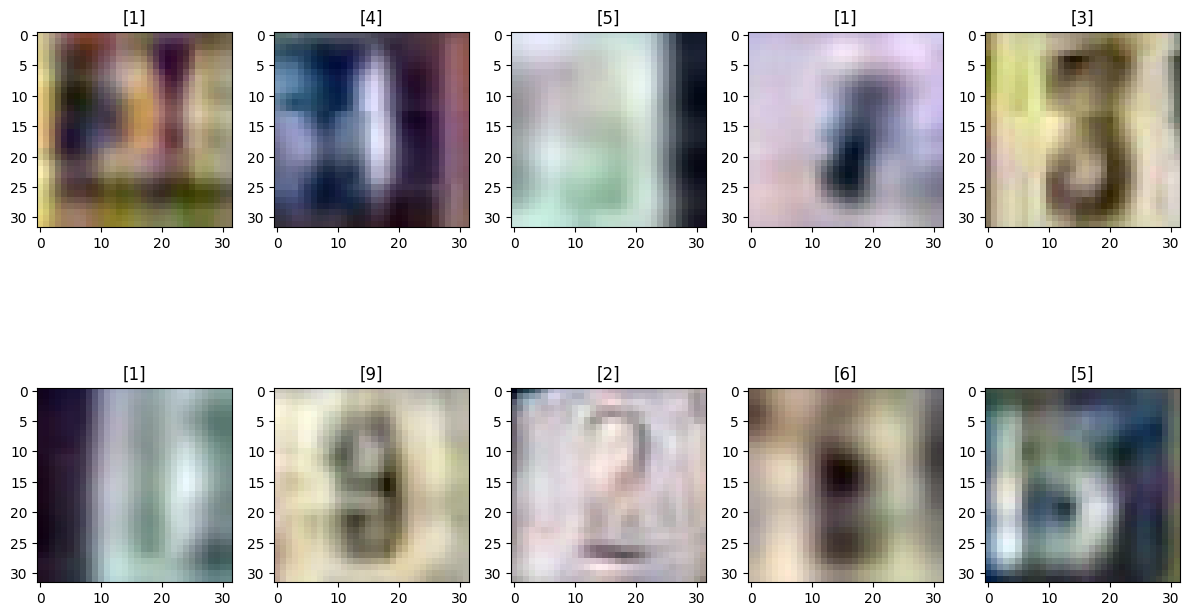

In [21]:
# just printing the images closest to centroid.
plot_images(closest_images_raw, closest_labels_raw)

Here, we can see the closest image of each cluster can be seen along with the labels of the image that is closest.

PCA_27 data clustering stastics:

In [22]:
cluster_labels_pca_27 = kmeans_pca_27.labels_
print(cluster_labels_pca_27)

[2 7 7 ... 4 2 2]


In [23]:
# Adding labels to clusters
label_dict_pca_27 = add_labels_to_cluster(cluster_labels_pca_27, labels_subset)

# Printing stastics
print_stat(label_dict_pca_27)

Cluster 0 , Most common label: 3
Number of occurrences of each class: {1: 390, 2: 368, 3: 377, 4: 399, 5: 386, 6: 404, 7: 413, 8: 371, 9: 375, 10: 380}
Cluster 1 , Most common label: 4
Number of occurrences of each class: {1: 295, 2: 326, 3: 309, 4: 313, 5: 316, 6: 304, 7: 306, 8: 328, 9: 329, 10: 356}
Cluster 2 , Most common label: 10
Number of occurrences of each class: {1: 246, 2: 263, 3: 256, 4: 264, 5: 263, 6: 243, 7: 255, 8: 243, 9: 263, 10: 265}
Cluster 3 , Most common label: 4
Number of occurrences of each class: {1: 97, 2: 101, 3: 87, 4: 103, 5: 95, 6: 146, 7: 141, 8: 149, 9: 109, 10: 176}
Cluster 4 , Most common label: 6
Number of occurrences of each class: {1: 307, 2: 291, 3: 330, 4: 289, 5: 307, 6: 263, 7: 325, 8: 262, 9: 254, 10: 255}
Cluster 5 , Most common label: 1
Number of occurrences of each class: {1: 193, 2: 152, 3: 138, 4: 92, 5: 113, 6: 87, 7: 95, 8: 81, 9: 86, 10: 34}
Cluster 6 , Most common label: 10
Number of occurrences of each class: {1: 270, 2: 323, 3: 313, 

Yes, we can find from the above stastics that iamges from same class are clustered teogther. The most common labels shows the label that are clustered teogther.

Here, we also observe that clustering in not perfect as we can find a good count of all labels in one cluster.

In [24]:
# Calculating the raw cluster centroids
cluster_centers_pca_27 = kmeans_pca_27.cluster_centers_

# Retrieving the closest images to each cluster centroid.
closest_images_pca_27, closest_labels_pca_27 = find_closest(cluster_centers_pca_27, pca_data_27)

# Printing the labels of closest image.
print(closest_labels_pca_27)

[[ 6]
 [ 9]
 [ 7]
 [10]
 [ 1]
 [ 1]
 [ 5]
 [ 7]
 [ 6]
 [ 2]]


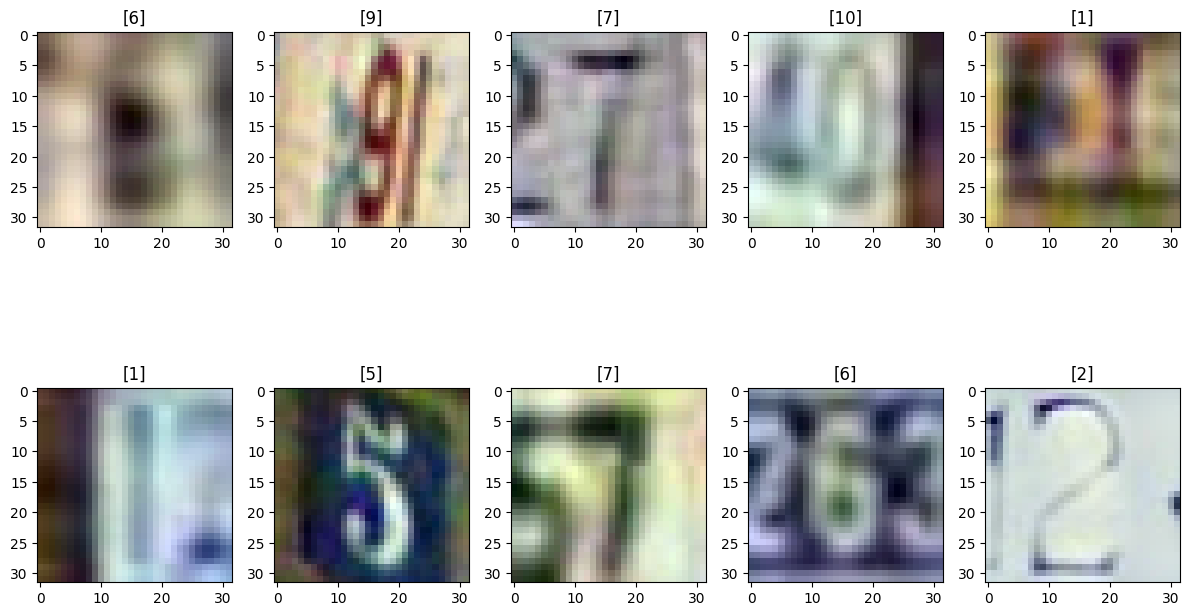

In [25]:
# just printing the images closest to centroid.
plot_images(closest_images_pca_27, closest_labels_pca_27)

Here, we can see the closest image of each cluster can be seen along with the labels of the image that is closest.

PCA_10 data clustering stastics:

In [26]:
cluster_labels_pca_10 = kmeans_pca_10.labels_
print(cluster_labels_pca_10)

[6 5 5 ... 2 6 6]


In [27]:
# Adding labels to clusters
label_dict_pca_10 = add_labels_to_cluster(cluster_labels_pca_10, labels_subset)

# Printing stastics
print_stat(label_dict_pca_10)

Cluster 0 , Most common label: 3
Number of occurrences of each class: {1: 197, 2: 154, 3: 134, 4: 92, 5: 116, 6: 89, 7: 96, 8: 81, 9: 88, 10: 34}
Cluster 1 , Most common label: 4
Number of occurrences of each class: {1: 144, 2: 138, 3: 123, 4: 125, 5: 139, 6: 157, 7: 111, 8: 120, 9: 112, 10: 123}
Cluster 2 , Most common label: 10
Number of occurrences of each class: {1: 308, 2: 290, 3: 332, 4: 290, 5: 312, 6: 265, 7: 326, 8: 264, 9: 255, 10: 256}
Cluster 3 , Most common label: 4
Number of occurrences of each class: {1: 223, 2: 196, 3: 223, 4: 276, 5: 197, 6: 194, 7: 191, 8: 260, 9: 236, 10: 244}
Cluster 4 , Most common label: 6
Number of occurrences of each class: {1: 294, 2: 319, 3: 305, 4: 313, 5: 316, 6: 304, 7: 302, 8: 327, 9: 327, 10: 356}
Cluster 5 , Most common label: 1
Number of occurrences of each class: {1: 338, 2: 340, 3: 340, 4: 323, 5: 353, 6: 382, 7: 357, 8: 348, 9: 351, 10: 353}
Cluster 6 , Most common label: 10
Number of occurrences of each class: {1: 248, 2: 268, 3: 26

Yes, we can find from the above stastics that iamges from same class are clustered teogther. The most common labels shows the label that are clustered teogther.

Here, we also observe that clustering in not perfect as we can find a good count of all labels in one cluster.

In [28]:
# Calculating the raw cluster centroids
cluster_centers_pca_10 = kmeans_pca_10.cluster_centers_

# Retrieving the closest images to each cluster centroid.
closest_images_pca_10, closest_labels_pca_10 = find_closest(cluster_centers_pca_10, pca_data_10)

# Printing the labels of closest image.
print(closest_labels_pca_10)

[[9]
 [3]
 [7]
 [9]
 [8]
 [8]
 [7]
 [4]
 [2]
 [6]]


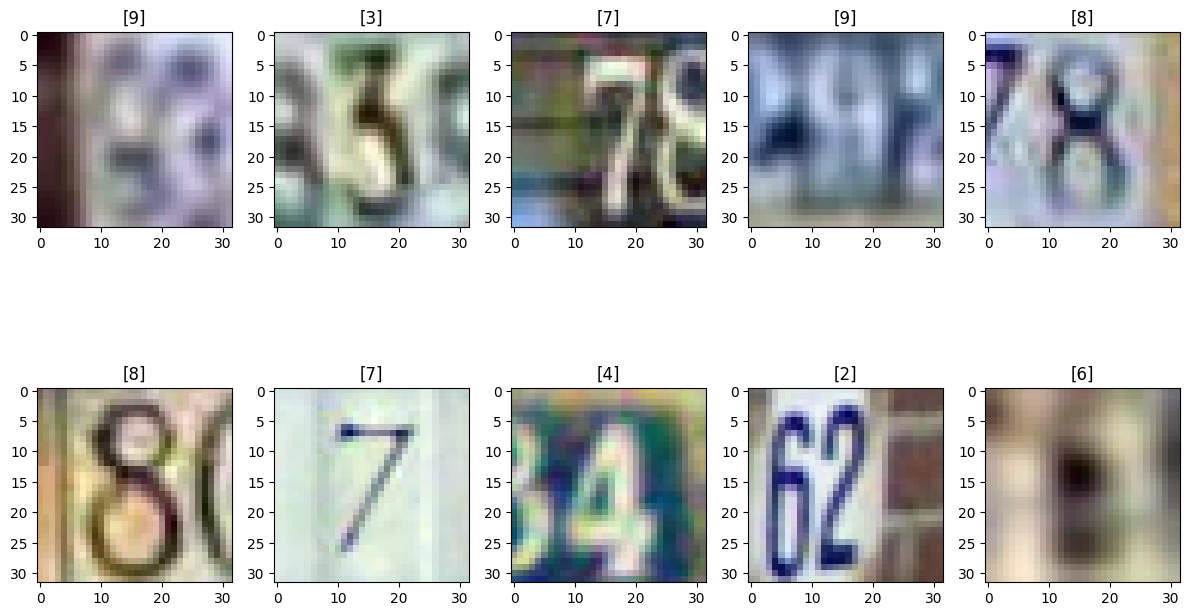

In [29]:
# just printing the images closest to centroid.
plot_images(closest_images_pca_10, closest_labels_pca_10)

Here, we can see the closest image of each cluster can be seen along with the labels of the image that is closest.

## Q2) (b)

Find the sum squared error for each of these different clustering obtained in 2 (a). Make
use of the label information associated with the images to evaluate your
clustering.Specifically, evaluate the goodness of your clusters for various cases in 2 (a)
by using two evaluation metrics purity and rand-index

In [30]:
# Finding sum squared error for raw data clustering.
sse_raw = kmeans_raw.inertia_

# Finding sum squared error for PCA 27 data.
sse_pca_27 = kmeans_pca_27.inertia_

# Finding sum squared error for PCA 10 data.
sse_pca_10 = kmeans_pca_10.inertia_

In [31]:
# Printing the SSE of all three clusterings.
print(f"SSE raw data: {sse_raw}")
print(f"SSE pca_27 data: {sse_pca_27}")
print(f"SSE pca_20 data: {sse_pca_10}")

SSE raw data: 31760589.93350368
SSE pca_27 data: 24151777.481817625
SSE pca_20 data: 17791754.501740213


In [32]:
# Function to calculate purity
def find_purity(true_labels, predicted_labels):
    # Finding contingency_matrix and calculatin purity
    contingency_matrix = confusion_matrix(true_labels, predicted_labels)
    row_index, col_index = linear_sum_assignment(-contingency_matrix)
    purity = contingency_matrix[row_index, col_index].sum() / np.sum(contingency_matrix)
    return purity

In [33]:
# Function to calculate random index
def find_random_index(true_labels, predicted_labels):
    # Find sum where predicted labels are True
    tp_plus_fp = np.sum(np.array(predicted_labels) == 1)

    # Find sum where true labels are True
    tp_plus_fn = np.sum(np.array(true_labels) == 1)

    a = np.sum(np.logical_and(predicted_labels[:, None] == 1, true_labels == 1))
    b = np.sum(np.logical_and(predicted_labels[:, None] == 0, true_labels == 0))

    # Calculate random index
    rand_index = (a + b) / (tp_plus_fp + tp_plus_fn)
    return rand_index

In [34]:
# Calcuate the purity of each of the three clusterings.
purity_raw = find_purity(labels_subset, cluster_labels_raw)
purity_pca_27 = find_purity(labels_subset, cluster_labels_pca_27)
purity_pca_10 = find_purity(labels_subset, cluster_labels_pca_10)

# Calcuate the Random Index of each of the three clusterings.
random_index_raw = find_random_index(labels_subset, cluster_labels_raw)
random_index_pca_27 = find_random_index(labels_subset, cluster_labels_pca_27)
random_index_pca_10 = find_random_index(labels_subset, cluster_labels_pca_10)

In [35]:
## Printing the purity and Random Index of all three clusterings.
print("purity Raw : ",purity_raw)
print("Rand Index Raw : ",random_index_raw)
print("purity PCA 27 : ",purity_pca_27)
print("Rand Index PCA 27 : ",random_index_pca_27)
print("purity PCA 10 : ",purity_pca_10)
print("Rand Index PCA 10 : ",random_index_pca_10)

purity Raw :  0.11588
Random Index Raw :  0.04681923157673735
purity PCA 27 :  0.11568
Random Index PCA 27 :  0.05191833861316438
purity PCA 10 :  0.11616
Random Index PCA 10 :  0.0379746835443038


## Q2) (c)

If you label each cluster with the digit that occurs most frequently within it, then what is
your classification accuracy with this unsupervised method for various cases ? How
does this compare with the accuracy you got with the K-NN classifier in Q1 (c)

In [36]:
# Function to find true and predicted labels
def find_true_and_pred_label(label_dict):
    predicted_labels= []
    true_labels = []
    # Iterating through each cluster in labels_dict
    for cluster_label, class_labels in label_dict.items():
        # Finding the most common label within the cluster
        most_common_label = mode(label_dict[cluster_label])

        # Assigning the most common label to all samples in the cluster
        predicted_labels.extend([most_common_label] * len(class_labels))

        # Storing true labels
        true_labels.extend(class_labels)

    # Returning values
    return predicted_labels, true_labels

In [44]:
# Calculating true and predicted labels of different clusterings.
predicted_labels_raw, true_labels_raw = find_true_and_pred_label(label_dict_raw)
predicted_labels_pca_27, true_labels_pca_27 = find_true_and_pred_label(label_dict_pca_27)
predicted_labels_pca_10, true_labels_pca_10 = find_true_and_pred_label(label_dict_pca_10)

# Calculating accurarcy of different clusterings.
accuracy_score_clus_raw_bf = accuracy_score(cluster_labels_raw, labels_subset)
accuracy_score_clus_pca_27_bf = accuracy_score(cluster_labels_pca_27, labels_subset)
accuracy_score_clus_pca_10_bf = accuracy_score(cluster_labels_pca_10, labels_subset)

# Calculating accurarcy of different clusterings.
accuracy_score_clus_raw_af = accuracy_score(predicted_labels_raw, true_labels_raw)
accuracy_score_clus_pca_27_af = accuracy_score(predicted_labels_pca_27, true_labels_pca_27)
accuracy_score_clus_pca_10_af = accuracy_score(predicted_labels_pca_10, true_labels_pca_10)

# Printing values of different clusterings before labelling each cluster with the digit that occurs most frequently within it.
print("Before labelling:")
print(f"accuracy_score_clustering_raw: {accuracy_score_clus_raw_bf:.5f}")
print(f"accuracy_score_clustering_pca_27: {accuracy_score_clus_pca_27_bf:.5f}")
print(f"accuracy_score_clustering_pca_10: {accuracy_score_clus_pca_10_bf:.5f}")

# Printing values of different clusterings after labelling each cluster with the digit that occurs most frequently within it.
print("After labelling:")
print(f"accuracy_score_clustering_raw: {accuracy_score_clus_raw_af:.5f}")
print(f"accuracy_score_clustering_pca_27: {accuracy_score_clus_pca_27_af:.5f}")
print(f"accuracy_score_clustering_pca_10: {accuracy_score_clus_pca_10_af:.5f}")

Before labelling:
accuracy_score_clustering_raw: 0.08728
accuracy_score_clustering_pca_27: 0.08372
accuracy_score_clustering_pca_10: 0.09588
After labelling:
accuracy_score_clustering_raw: 0.11768
accuracy_score_clustering_pca_27: 0.11752
accuracy_score_clustering_pca_10: 0.11792


Here, we can see that after labelling each cluster with the digit that occurs most frequently within it, the accuracy of the classification increases.

The accuracy of the classification with this unsupervised method is very low as compared to the accuracy we got with the K-NN classifier in Q1 (c).

**After labelling accuracy in unsupervised method:**

- Accuracy_score_clustering_raw: 0.11768
- Accuracy_score_clustering_pca_27: 0.11752
- Accuracy_score_clustering_pca_10: 0.11792

**Accuracy in K-NN classifier:**

- KNN accuracy on raw data: 0.427704
- KNN accuracy on data with 27 dimensions: 0.425745
- KNN accuracy on data with 10 dimensions: 0.270282

## Q2) (d)

Perform k means clustering with k=5 on data obtained after PCA dimensionality
reduction for dimension as found in question 1 (a). Find the sum squared error for each
of these cases. Do you observe images from different classes to be clustered together ?
which all classes do you find are getting clustered together.

In [38]:
# Applying clustering on pca 27 data with 5 clusters
kmeans_pca_27_5 = KMeans(n_clusters=5, random_state=42)
kmeans_pca_27_5.fit(pca_data_27)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [39]:
# Finding cluster labels for each data point.
labels_pca_27_5 = kmeans_pca_27_5.labels_

# Finding cluster centers.
cluster_centers_pca_27_5 = kmeans_pca_27_5.cluster_centers_

# Calculating the sum squared error (SSE) for each cluster
sse_per_cluster = []
for i in range(5):
    # Select the ith cluster points
    cluster_points = pca_data_27[labels_pca_27_5 == i]
    sse = np.sum((cluster_points - cluster_centers_pca_27_5[i]) ** 2)
    sse_per_cluster.append(sse)

In [40]:
# Print SSE for each cluster
for i, sse in enumerate(sse_per_cluster):
    print(f"Cluster {i + 1} SSE: {sse}")

# Finding and printing the SSE of whole custer.
sse_pca_5 = kmeans_pca_27_5.inertia_
print(f"Complete model SSE: {sse_pca_5}")

Cluster 1 SSE: 6920517.605806679
Cluster 2 SSE: 7282046.425869763
Cluster 3 SSE: 6823239.285972444
Cluster 4 SSE: 3600504.634001447
Cluster 5 SSE: 3387962.266326775
Complete model SSE: 28014270.217977136


In [41]:
# Creating a dictonary with each cluster value as key
labels_dict_27_5 = {0: [], 1: [], 2: [], 3: [], 4: []}

# Iterating through the list and adding labels to correct cluster
for i in range(len(labels_subset)):
    labels_dict_27_5[labels_pca_27_5[i]].append(labels_subset[i][0])

# Printing values of each cluster.
for i in range(5):
    print(f"Cluster {i} : {labels_dict_27_5[i]}")


Cluster 0 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [42]:
# Iterate through each cluster in label_dict
for cluster_label, class_labels in labels_dict_27_5.items():

    # Count the occurrences of each class label in the cluster
    class_label_counts = count(class_labels)
    most_common = mode(labels_dict_27_5[cluster_label])
    second_most_common = mode([x for x in labels_dict_27_5[cluster_label] if x != most_common])
    print(f"Cluster {cluster_label} , Most common label: {most_common}, Second most common label: {second_most_common}")
    print(f"Number of occurrences of each class: {class_label_counts}")

Cluster 0 , Most common label: 9, Second most common label: 4
Number of occurrences of each class: {1: 693, 2: 709, 3: 695, 4: 710, 5: 695, 6: 691, 7: 696, 8: 710, 9: 761, 10: 686}
Cluster 1 , Most common label: 8, Second most common label: 10
Number of occurrences of each class: {1: 656, 2: 596, 3: 627, 4: 642, 5: 617, 6: 641, 7: 634, 8: 675, 9: 647, 10: 663}
Cluster 2 , Most common label: 2, Second most common label: 10
Number of occurrences of each class: {1: 471, 2: 514, 3: 460, 4: 457, 5: 468, 6: 470, 7: 502, 8: 459, 9: 444, 10: 508}
Cluster 3 , Most common label: 3, Second most common label: 5
Number of occurrences of each class: {1: 448, 2: 450, 3: 507, 4: 464, 5: 502, 6: 453, 7: 486, 8: 441, 9: 449, 10: 432}
Cluster 4 , Most common label: 6, Second most common label: 1
Number of occurrences of each class: {1: 232, 2: 231, 3: 211, 4: 227, 5: 218, 6: 245, 7: 182, 8: 215, 9: 199, 10: 211}


Yes, we can find from the above stastics that iamges from same class are clustered teogther. The most common labels and Second most common label shows the label that are clustered teogther.

Here, we also observe that clustering in not perfect as we can find a good count of all labels in one cluster.